# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz



## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Уборщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()


dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
jobs = ["актриса кино", "Водитель трамвая", "учитель информатики", "садовник", "кондуктор"]
vacancy = []
for job in jobs:
    params = {
      'text': job,
      'area': 1,
      'page': 0,
      'per_page': 100
    }
    data = requests.get(URL, params).json()
    cnt_pages = data["pages"]
    for i in range(0, cnt_pages):
        params["page"] = i
        sleep(0.2)
        data = requests.get(URL, params).json()
        for vac in data["items"]:
            vacancy.append(vac)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
print(len(vacancy))

319


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, coords):
        self.name = name
        self.coords = coords

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
company = []
for vac in vacancy:
    name = None
    if vac["department"] is not None:
        name = vac["department"]["name"]
    coord = (None, None)
    if vac["address"] is not None:
        coord = (vac["address"]["lat"], vac["address"]["lng"])
    company.append(Company(name, coord))


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
sum(True for i in company if i.coords != (None, None))

199

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
company_in_mkad = [cur for cur in company if cur.coords != (None, None) and 55.576242 <= cur.coords[0] <= 55.913983 and 37.367246 <= cur.coords[1] <= 37.838285]

\(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

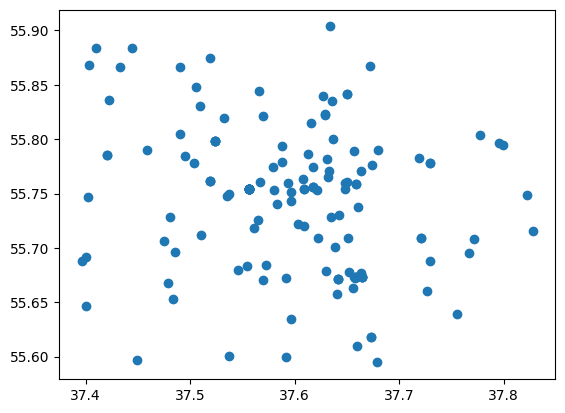

In [ ]:
xs = [cur.coords[1] for cur in company_in_mkad]
ys = [cur.coords[0] for cur in company_in_mkad]
plt.figure()
plt.scatter(xs, ys)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
dt = pd.DataFrame({"name": [i.name for i in company_in_mkad], "lat": [i.coords[0] for i in company_in_mkad], "lon": [i.coords[1] for i in company_in_mkad]})

fig = px.scatter_mapbox(dt, lat="lat", lon="lon",
                        color_discrete_sequence=["fuchsia"], zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

Как мы видим, для данных профессий, вакансий в центре города сильно больше, чем на окраине. Так же эти профессии не очень популярны

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 223MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
print(diamonds["total_sales_price"].idxmax(), "-", diamonds["total_sales_price"].max())
print(diamonds["total_sales_price"].idxmin(), "-", diamonds["total_sales_price"].min())

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
(diamonds.isnull().sum() + (diamonds == 'unknown').sum()).sum()

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
[x for x in diamonds if (diamonds.isnull().sum() + (diamonds == 'unknown').sum())[x] > 0]

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
cols_starts_with = [el for el in diamonds if el.startswith("fancy_color_") or el.startswith("fluor_")]
len(cols_starts_with)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
sum_unknown = sum([(diamonds[el].isnull().sum() + (diamonds[el] == 'unknown').sum()).sum() for el in cols_starts_with])
len(cols_starts_with) * diamonds.shape[0] - sum_unknown

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(cols_starts_with, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
cols_starts_with = [el for el in diamonds if el.startswith("culet_")]
diamonds.drop(cols_starts_with, axis=1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds["total_sales_price"].sum() // 1000

1517721

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
categ_ = ["cut", "color", "clarity", "cut_quality", "lab", "symmetry", "polish", "eye_clean"]
diamonds[categ_]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown
...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
(diamonds["total_sales_price"]).dot(diamonds["total_sales_price"].transpose())

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

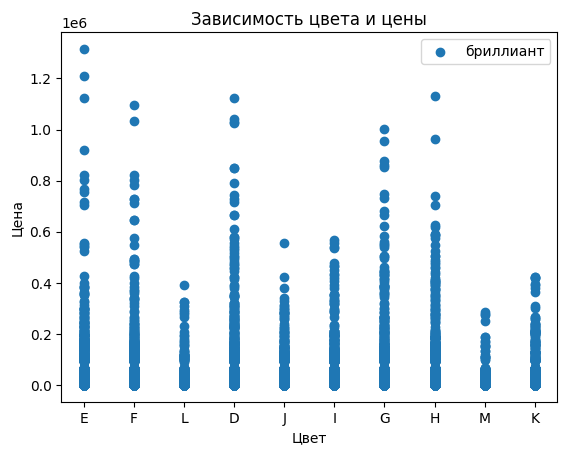

In [ ]:
cleaned_diamonds = diamonds[["color", "total_sales_price"]].dropna()
cleaned_diamonds = cleaned_diamonds[cleaned_diamonds.color != "unknown"]
plt.figure()
plt.scatter(cleaned_diamonds["color"], cleaned_diamonds["total_sales_price"], label="бриллиант")
plt.title('Зависимость цвета и цены')
plt.xlabel('Цвет')
plt.ylabel('Цена', rotation=90)
plt.legend()
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

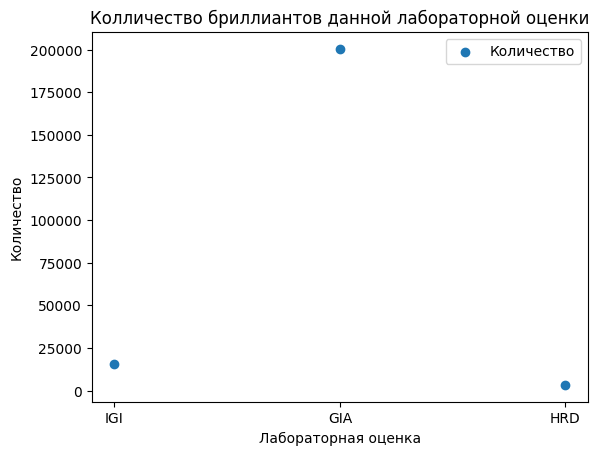

In [ ]:
cleaned_diamonds = diamonds["lab"].dropna()
labs = cleaned_diamonds.unique()
plt.figure()
plt.scatter(labs, [sum([True for j in cleaned_diamonds if i == j]) for i in labs], label="Количество")
plt.title('Колличество бриллиантов данной лабораторной оценки')
plt.xlabel('Лабораторная оценка')
plt.ylabel('Количество', rotation=90)
plt.legend()
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

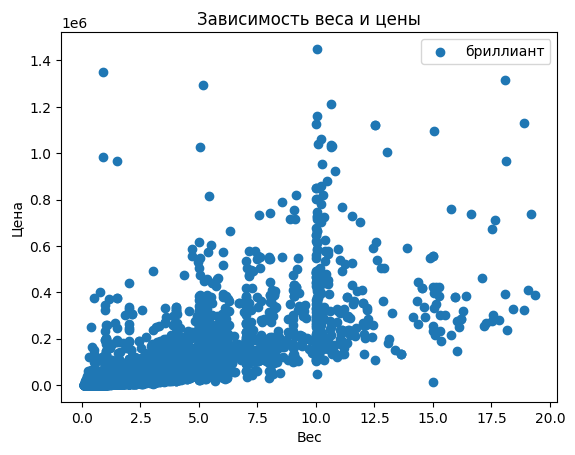

In [ ]:
cleaned_diamonds = diamonds[["carat_weight", "total_sales_price"]].dropna()
cleaned_diamonds = cleaned_diamonds[cleaned_diamonds.carat_weight != "unknown"]
plt.figure()
plt.scatter(cleaned_diamonds["carat_weight"], cleaned_diamonds["total_sales_price"], label="бриллиант")
plt.title('Зависимость веса и цены')
plt.xlabel('Вес')
plt.ylabel('Цена', rotation=90)
plt.legend()
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

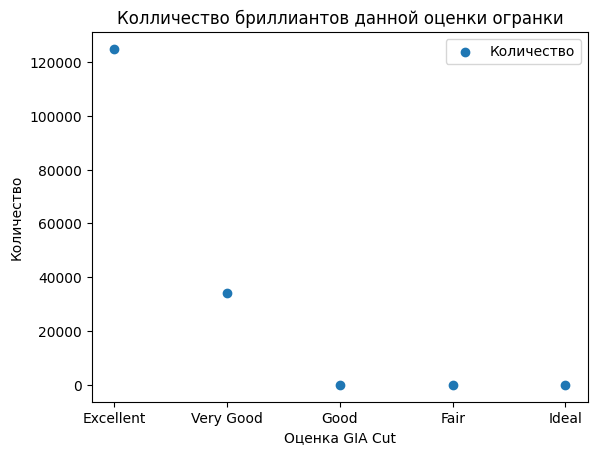

In [ ]:
cleaned_diamonds = diamonds["cut_quality"].dropna()
labs = cleaned_diamonds.unique()
labs = np.delete(labs, np.where(labs == "unknown"))
plt.figure()
plt.scatter(labs, [sum([True for j in cleaned_diamonds if i == j]) for i in labs], label="Количество")
plt.title('Колличество бриллиантов данной оценки огранки')
plt.xlabel('Оценка GIA Cut')
plt.ylabel('Количество', rotation=90)
plt.legend()
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

Мы видим, что количество алмазов оценки Excellent сильно больше, чем остальных. Так же мы видим, что у большого количества алмазов вес 10 карат. И то что цена алмаза не зависит от его цвета

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
df = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
df.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
df = df.sample(frac=1)
df

,meas_length,meas_width,meas_depth,total_sales_price
57221,4.38,4.40,2.66,972
163369,8.01,5.33,3.14,5010
69754,4.52,4.54,2.79,1050
22227,3.78,3.81,2.38,740
122254,5.11,5.13,3.22,2474
...,...,...,...,...
51098,4.22,4.28,2.60,936
217411,9.81,9.84,6.00,123754
121487,5.56,5.62,3.53,2436
182714,6.97,7.01,4.37,8375


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
df.insert(loc= len(df.columns) , column='mink_sum', value=[(df['meas_width'][i] ** 3 + df['meas_depth'][i] ** 3 + df['meas_length'][i] ** 3) ** (1/3) for i in range(df.shape[0])])
df

,meas_length,meas_width,meas_depth,total_sales_price,mink_sum
57221,4.38,4.40,2.66,972,3.745015
163369,8.01,5.33,3.14,5010,3.748797
69754,4.52,4.54,2.79,1050,3.775608
22227,3.78,3.81,2.38,740,3.754425
122254,5.11,5.13,3.22,2474,3.694108
...,...,...,...,...,...
51098,4.22,4.28,2.60,936,18.449681
217411,9.81,9.84,6.00,123754,13.408649
121487,5.56,5.62,3.53,2436,22.257728
182714,6.97,7.01,4.37,8375,6.706710


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
new_df = df[["mink_sum", "total_sales_price"]]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
df_train, df_test = train_test_split(new_df, test_size=0.2, random_state=0)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

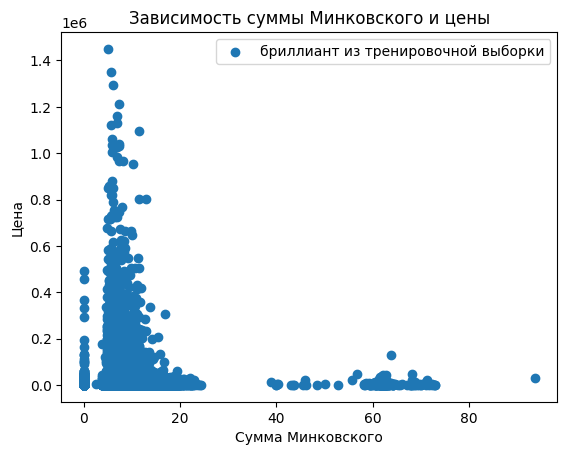

In [ ]:
plt.figure()
plt.scatter(df_train["mink_sum"], df_train["total_sales_price"], label="бриллиант из тренировочной выборки")
plt.title('Зависимость суммы Минковского и цены')
plt.xlabel('Сумма Минковского')
plt.ylabel('Цена', rotation=90)
plt.legend()
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

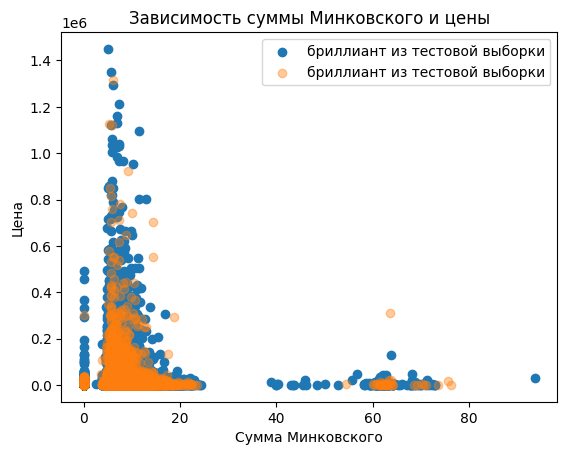

In [ ]:
plt.figure()
plt.scatter(df_train["mink_sum"], df_train["total_sales_price"], label="бриллиант из тестовой выборки", alpha=1)
plt.scatter(df_test["mink_sum"], df_test["total_sales_price"], label="бриллиант из тестовой выборки", alpha=0.4)
plt.title('Зависимость суммы Минковского и цены')
plt.xlabel('Сумма Минковского')
plt.ylabel('Цена', rotation=90)
plt.legend()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
df_test = df_test.sort_values(by=['mink_sum'])
df_train = df_train.sort_values(by=['mink_sum'])
ind_train = df_train.index


def find_closest(ind):
    l = 0
    r = df_train.shape[0]
    while r - l > 1:
        mid = (l + r) // 2
        if df_train["mink_sum"][ind_train[mid]] < df_test["mink_sum"][ind]:
            l = mid
        else:
            r = mid
    return ind_train[mid];


df_test.insert(loc= len(df_test.columns) , column='ind_closest', value=[find_closest(i) for i in df_test.index])
df_test


,mink_sum,total_sales_price,ind_closest
24319,0.000000,750,190649
119011,0.000000,2370,190649
202052,0.000000,15453,190649
48171,0.000000,918,190649
170989,0.000000,6052,190649
...,...,...,...
83524,70.721942,1210,187601
8810,71.123951,592,207883
44051,73.634434,888,211769
202297,75.594021,15638,211769


In [ ]:
df_test.insert(loc= len(df_test.columns) , column='dist_to_closest', value=[abs(df_test["mink_sum"][i] - df_train["mink_sum"][df_test["ind_closest"][i]]) for i in df_test.index])


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
[abs(df_test["total_sales_price"][i] - df_train["total_sales_price"][df_test["ind_closest"][i]]) / df_test["total_sales_price"][i] * 100 for i in df_test.index]

[1225.0666666666668,
 319.32489451476795,
 35.68886300394745,
 982.5708061002179,
 64.21017845340383,
 208.05951642901425,
 656.316590563166,
 14.625144175317187,
 968.6021505376343,
 36.18032365784742,
 550.3926701570681,
 71.9233811730139,
 644.9775112443779,
 823.6059479553903,
 770.2276707530648,
 743.6332767402376,
 473.1257208765859,
 557.2751322751323,
 32.97814944699218,
 130.79424059451927,
 134.6081208687441,
 1361.4705882352941,
 71.308967030429,
 392.4677898909812,
 1021.6704288939052,
 10.04706734250543,
 1190.6493506493507,
 379.17068466730956,
 905.8704453441296,
 198.25930372148858,
 292.1862667719021,
 937.3695198329854,
 23.40064744874364,
 770.2276707530648,
 528.1921618204805,
 1211.0817941952507,
 192.81084266352386,
 12.650192700068011,
 1235.752688172043,
 964.0256959314776,
 9.291712303760496,
 508.2007343941249,
 181.05203619909503,
 813.4191176470589,
 696.3141025641025,
 1174.102564102564,
 821.8923933209646,
 851.9157088122606,
 922.4279835390947,
 1327.8735

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

In [ ]:
categ_

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean']

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
def code_df(df):
    names = df.columns.values
    onehotencoder = OneHotEncoder(sparse_output=False)
    encoded_df = pd.DataFrame(onehotencoder.fit_transform(df[names]))
    return encoded_df


df = diamonds[[categ_[0], categ_[1]]]
df = code_df(df)
df.insert(loc= len(df.columns) , column='total_sales_price', value=diamonds["total_sales_price"])
df


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,total_sales_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1210692
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1292500
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1315496
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1350000


\(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
Y = df['total_sales_price']
df = df.drop(['total_sales_price'], axis=1)
df_train, df_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.2, random_state=0)


In [ ]:
clf = DecisionTreeRegressor(random_state=42)
clf = clf.fit(df_train, Y_train)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
mean_squared_error(Y_test, clf.predict(df_test))

734631944.6899471

In [ ]:
for i in range(len(categ_)):
    for j in range(i + 1, len(categ_)):
        df = diamonds[[categ_[i], categ_[j]]]
        df = code_df(df)
        df.insert(loc= len(df.columns) , column='total_sales_price', value=diamonds["total_sales_price"])
        Y = df['total_sales_price']
        df = df.drop(['total_sales_price'], axis=1)
        df_train, df_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.2, random_state=0)
        clf = DecisionTreeRegressor(random_state=42)
        clf.fit(df_train, Y_train)
        print(mean_squared_error(Y_test, clf.predict(df_test)), categ_[i], categ_[j])

721078766.8147979 cut color
723090921.2970089 cut clarity
723303387.7579298 cut cut_quality
722458412.484701 cut lab
716520159.441909 cut symmetry
722438777.2532524 cut polish
723749812.6604267 cut eye_clean
728389860.1956697 color clarity
725119479.4404914 color cut_quality
728587533.4266952 color lab
729423423.9636129 color symmetry
730310437.1786501 color polish
728971534.7174156 color eye_clean
727390614.2530394 clarity cut_quality
734558142.0095764 clarity lab
733920392.5734292 clarity symmetry
734377629.1047169 clarity polish
734146925.3601947 clarity eye_clean
725952226.9778717 cut_quality lab
722175072.7962141 cut_quality symmetry
727188715.7921395 cut_quality polish
727209087.781704 cut_quality eye_clean
732909154.7186834 lab symmetry
734647924.7314892 lab polish
733256929.4977152 lab eye_clean
734495238.4459261 symmetry polish
733088641.3610052 symmetry eye_clean
734631944.6899471 polish eye_clean


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

Мы понимаем, что между категориальными признаками и ценой нет никакой корелляции (и это логично, потому что мы никак не учитываем размер и подобное). Так же моя модель показывает примерно те же результаты, что и модель из sklearn

Ваши выводы здесь :)